<a href="https://colab.research.google.com/github/pathilink/sp_global_bootcamp/blob/main/9_exercicio_visualizacao_dados/exercicio_visualizacao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Visualização de Dados

## Bibliotecas

In [1]:
import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

## Desafio 1

In [2]:
df_saude = pd.read_csv('/content/drive/MyDrive/WoMakersCode/Bootcamp S&P Global/Visualização de dados/saude.csv')
df_saude.head()

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


In [3]:
df_saude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10 non-null     int64 
 1   age     10 non-null     int64 
 2   height  10 non-null     int64 
 3   weight  10 non-null     int64 
 4   gender  10 non-null     object
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes


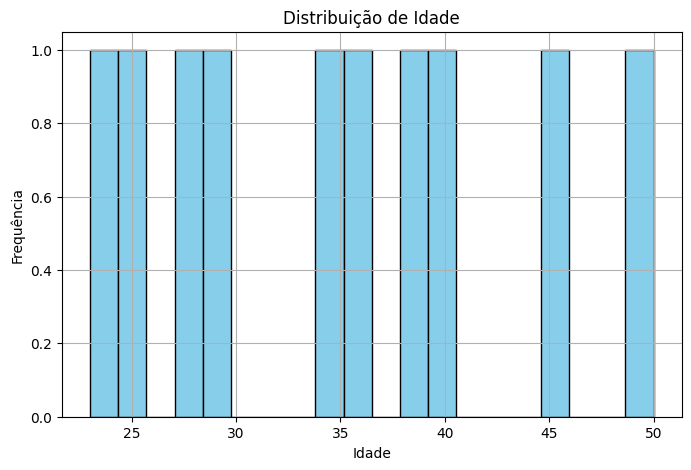

In [4]:
plt.figure(figsize=(8, 5))
plt.hist(df_saude['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

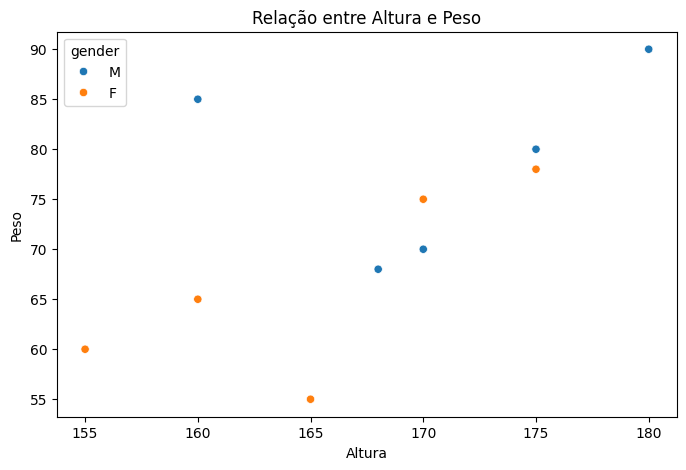

In [5]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_saude, x='height', y='weight', hue='gender')
plt.title('Relação entre Altura e Peso')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.show()

In [6]:
fig = px.bar(df_saude['gender'].value_counts().reset_index(),
             x='count', y='gender',
             labels={'index': 'Gênero', 'gender': 'Contagem'},
             title='Contagem por Gênero')
fig.show()

## Desafio 2

In [7]:
df_vendas = pd.read_csv('/content/drive/MyDrive/WoMakersCode/Bootcamp S&P Global/Visualização de dados/vendas.csv')
df_vendas.head()

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


In [8]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    31 non-null     object
 1   sales   31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 628.0+ bytes


In [9]:
# object -> datetime
df_vendas['date'] = pd.to_datetime(df_vendas['date'])

df_vendas = df_vendas.sort_values('date')

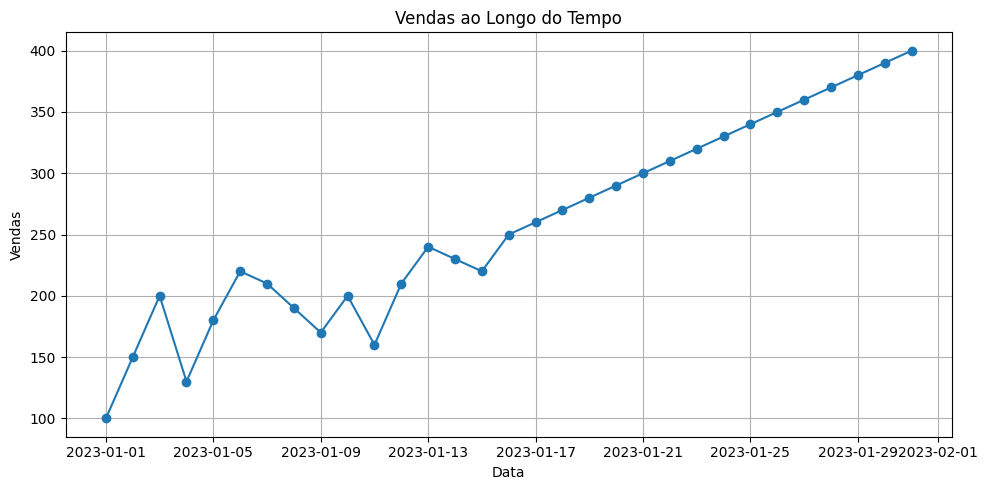

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df_vendas['date'], df_vendas['sales'], marker='o', linestyle='-')
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# série temporal com frequência
df_vendas.set_index('date', inplace=True)
result = seasonal_decompose(df_vendas['sales'], model='additive', period=12)


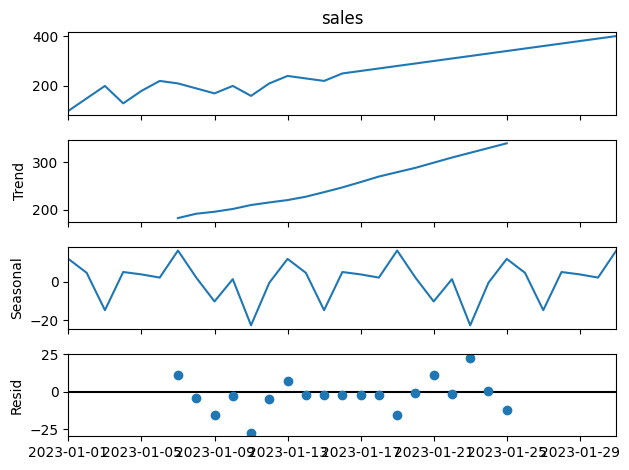

In [12]:
# decomposição sazonal
result.plot()
plt.tight_layout()
plt.show()

In [13]:
df_vendas.reset_index(inplace=True)
fig = px.line(df_vendas, x='date', y='sales',
              title='Vendas Interativas ao Longo do Tempo',
              labels={'date': 'Data', 'sales': 'Vendas'})
fig.show()